<a href="https://colab.research.google.com/github/Ali-mohammadi-design/PyTorch_for_medical_images/blob/main/ANN_Mnist_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

**Downloading Mnist dataset and convert it to a tensor**

In [4]:
transform= transforms.ToTensor()

Input: transforms.ToTensor() takes an image as input, typically in the form of a PIL.Image or a NumPy array.


Output: It converts the image into a PyTorch tensor.


Normalization: Additionally, it scales the pixel values from the range [0, 255] (for 8-bit images) to the range [0, 1], which is a floating-point range.

In [5]:
train_data=datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 8834452.57it/s] 


Extracting ../Data/MNIST/raw/train-images-idx3-ubyte.gz to ../Data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2119461.35it/s]

Extracting ../Data/MNIST/raw/train-labels-idx1-ubyte.gz to ../Data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 15249061.02it/s]


Extracting ../Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7957614.36it/s]


Extracting ../Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/MNIST/raw



In [6]:
test_data=datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

Note: As is clear the first element has 28 X 28 data that some of them are 0 and some other have values between 0 to 1. The next element is the label of the picture. In this case it is 5.

In [10]:
type(train_data[0])

tuple

In [11]:
image, label=train_data[0]

In [12]:
image.shape

torch.Size([1, 28, 28])

As is clear it is 28 X 28. The 1 is for the color. Mnist only has 1 channel for the color.

In [13]:
label

5

Note: to show the image by plt.imshow() we need the image just be on a 28X28 without the color channels

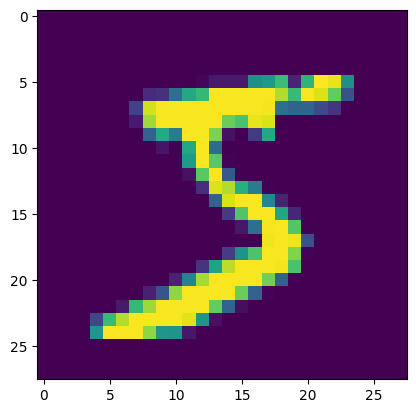

In [14]:
plt.imshow(image.reshape(28,28))

**How to load baches in to the dataloader**

We have 60000 data for training the machine. we can send the data with batches.

By dividing the data into smaller batches, the neural network can process the data more quickly and make better use of its computational resources. This can significantly reduce the time it takes to train the network.

In [15]:
torch.manual_seed(101)
#have the same shuffling

train_loader=DataLoader(train_data, batch_size=100, shuffle=True)
#Sometimes the data set is sorted so we would shuffle to have a general dataset.

test_loader=DataLoader(test_data, batch_size=500, shuffle=False)

**Create a Model**

In [16]:
class MultilayerPerceptron(nn.Module):
  def __init__(self,in_sz=28*28, out_sz=10, layers=[120,84]):
    super().__init__()
    self.fc1=nn.Linear(in_sz, layers[0])
    self.fc2=nn.Linear(layers[0],layers[1])
    self.fc3=nn.Linear(layers[1],out_sz)

  def forward(self,X):
    X=f.relu(self.fc1(X))
    X=f.relu(self.fc2(X))
    X=self.fc3(X)

    return f.log_softmax(X,dim=1) #multi class classification




class MultilayerPerceptron:

This line defines a new class (a template or blueprint for creating objects). The name MultilayerPerceptron is the name you’re giving to this blueprint. You can create multiple instances (individual neural networks) based on this blueprint.
(nn.Module):

The nn.Module part means that the MultilayerPerceptron class is a special kind of class that inherits from PyTorch’s nn.Module class.
nn.Module is a base class for all neural network modules in PyTorch. It provides a lot of functionality that is useful for building and training neural networks, such as methods for defining layers, handling weights, and passing data through the network.

__init__:

This line defines a special method called __init__. It runs when you create an instance of your MultilayerPerceptron class.

in_sz=28*28: This sets the size of the input (e.g., an image with 28x28 pixels, like in the MNIST dataset).


out_sz=10: This sets the number of output classes (e.g., 10 digits: 0-9).
layers=[120, 84]: This is a list that specifies the sizes of two hidden layers in the network.


Analogy: When you create your robot, you decide it will handle images of a certain size, recognize a certain number of objects, and have a specific number of parts (layers) to process the information.

super().__init__()

This line calls the __init__ method of the parent class nn.Module. It ensures that the robot is set up correctly according to the basic blueprint provided by nn.Module.


Analogy: You are telling your robot to inherit all the basic functionalities of other robots of its kind, just like inheriting traits from your parents.

 Defining the First Layer: self.fc1 = nn.Linear(in_sz, layers[0])

 This line creates the first fully connected layer, which takes the input (e.g., an image) and outputs to the first hidden layer with 120 neurons.


Analogy: Imagine the first part of the robot’s brain that processes the input signals (like vision) and passes the processed information to the next part.



Defining the Second Layer: self.fc2 = nn.Linear(layers[0], layers[1])

This line creates the second fully connected layer, which takes the output from the first layer (120 neurons) and passes it to the second hidden layer with 84 neurons.
Analogy: The robot processes the information further in another part of its brain, refining the signals to prepare for decision-making.

Defining the Third (Output) Layer: self.fc3 = nn.Linear(layers[1], out_sz)

This line creates the third fully connected layer, which takes the output from the second hidden layer (84 neurons) and produces the final output (10 classes).


Analogy: This is the final part of the robot’s brain where it decides what the input was (like deciding which number it saw).

Forward Method Definition: def forward(self, X):

This line defines how the data (input) flows through the network (from one layer to another).
Analogy: It’s like describing the path information takes as it travels through the robot’s brain.

First Layer Activation: X = f.relu(self.fc1(X))

This line sends the input through the first layer, then applies the ReLU activation function (which adds non-linearity, making the model more powerful).
Analogy: The robot processes the input and transforms it to focus only on the most important signals, ignoring weak ones (like ignoring noise in an image).

Applying Softmax for Multi-Class Classification: return f.log_softmax(X, dim=1)

This line applies the log_softmax function to the output. It converts the raw scores into probabilities (between 0 and 1) for each class and takes the logarithm.

Analogy: The robot now calculates the chances of its prediction being each possible class (e.g., how confident it is that the image is a "7" versus a "3").


In [17]:
torch.manual_seed(101)
model=MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [18]:
criterion=nn.CrossEntropyLoss()

In [19]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.001 )

**Enumerate()**

You can use enumerate() in a loop in almost the same way that you use the original iterable object. Instead of putting the iterable directly after in in the for loop, you put it inside the parentheses of enumerate().

When you use enumerate(), the function gives you back two loop variables:

The count of the current iteration
The value of the item at the current iteration
Just like with a normal for loop, the loop variables can be named whatever you want them to be named. You use count and value in this example, but they could be named i and v or any other valid Python names.

In [20]:
list=['a','d','f']
for c,d in enumerate(list):
  print(c,d)

0 a
1 d
2 f


**Data Flatenning to be used in ANN**

With .view()


**Model Training**

In [21]:
import time
start_time=time.time()

#training
epochs=5
trn_corr=0
tst_corr=0


#trackers
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
      b=b+1 #start at 0 so we add 1 to start at 1
      y_pred=model(X_train.view(100,-1))
      #view(number of the batches,-1) would flatten the data
      loss=criterion(y_pred,y_train)
      predicted=torch.max(y_pred.data,1)[1]
      # in the last layer we have 10 neurons. each neuron would return a possibility of that class. Maybe it is [0.1,0.4,....,0.8].
      #the above code would get the all neurons values on axis 1 and sort them and return the one that has max value

      batch_corr=(predicted==y_train).sum()
      #how many of the the batch is equall to y_train. .sum() would make the summation!
      trn_corr= batch_corr + trn_corr

      optimizer.zero_grad()
      #The line optimizer.zero_grad() is used to reset the gradients of all the model parameters to zero before starting the backpropagation step during training.
      loss.backward()
      #loss.backward() is the PyTorch function that performs the backpropagation step.
      #It computes the gradients of the loss function with respect to the model parameters (weights and biases)
      optimizer.step()
      #The optimizer.step() is responsible for updating the model's parameters (weights and biases)
      #based on the gradients that were calculated during backpropagation (loss.backward()).

      if b%200==0:
        accuracy=trn_corr.item()*100/(100*b)
        print(f"Epoch {i} batch {b} loss: {loss.item()} accuaracy:{accuracy} ")

    train_losses.append(loss.item())
    train_correct.append(trn_corr)

#for test set we do not update the biasis thus we uswd with
    with torch.no_grad():
      for b,(x_test,y_test) in enumerate(test_loader):
        y_val=model(x_test.view(500,-1))
        predicted=torch.max(y_val.data,1)[1]
        tst_corr += (predicted == y_test).sum()

    loss=criterion(y_val,y_test)
    test_losses.append(loss.item())
    test_correct.append(tst_corr)












total_time=time.time()-start_time
print(f'Duration={total_time/60} mins.')


Epoch 0 batch 200 loss: 0.23541299998760223 accuaracy:83.25 
Epoch 0 batch 400 loss: 0.3537280559539795 accuaracy:87.5275 
Epoch 0 batch 600 loss: 0.13651520013809204 accuaracy:89.57333333333334 
Epoch 1 batch 200 loss: 0.24385470151901245 accuaracy:94.825 
Epoch 1 batch 400 loss: 0.14487527310848236 accuaracy:95.06 
Epoch 1 batch 600 loss: 0.07246916741132736 accuaracy:95.36 
Epoch 2 batch 200 loss: 0.08382391184568405 accuaracy:96.52 
Epoch 2 batch 400 loss: 0.06502086669206619 accuaracy:96.625 
Epoch 2 batch 600 loss: 0.06827977299690247 accuaracy:96.71666666666667 
Epoch 3 batch 200 loss: 0.12022455036640167 accuaracy:97.635 
Epoch 3 batch 400 loss: 0.058163758367300034 accuaracy:97.5 
Epoch 3 batch 600 loss: 0.03137049823999405 accuaracy:97.5 
Epoch 4 batch 200 loss: 0.11588415503501892 accuaracy:98.155 
Epoch 4 batch 400 loss: 0.0415460504591465 accuaracy:98.005 
Epoch 4 batch 600 loss: 0.048713117837905884 accuaracy:98.02166666666666 
Duration=1.2097153345743814 mins.


Note:The .sum() function in PyTorch adds up all the values in a tensor. Think of it like a calculator that totals everything in a list.

In the code you shared, batch_corr=(predicted==y_train).sum():

predicted==y_train: This checks if the predicted labels (from your model) match the actual labels (the correct answers). If they match, it returns True; otherwise, it returns False. In Python, True is treated as 1, and False as 0.

Example: If predicted is [1, 2, 3] and y_train is [1, 2, 0], then predicted == y_train gives [True, True, False], which is [1, 1, 0].
.sum(): This adds up all the 1s in the tensor from the previous step.

Example: For [1, 1, 0], .sum() would give 1 + 1 + 0 = 2.

The line optimizer.zero_grad() is used to reset the gradients of all the model parameters to zero before starting the backpropagation step during training.

**backpropagation**


Backpropagation (short for "backward propagation of errors") is a key algorithm used to train neural networks. It allows the network to learn by adjusting its weights based on the error (difference between predicted output and actual output). Here's how it works:

Steps of Backpropagation:


Forward Pass:

The input data is passed through the neural network layer by layer.
Each layer performs calculations and applies an activation function to pass data to the next layer until a final output (prediction) is produced.
Calculate Loss:

The difference (error) between the predicted output and the actual output (ground truth) is calculated using a loss function (like Mean Squared Error or Cross-Entropy Loss).


Backward Pass (Gradient Calculation):

The goal is to minimize the loss by adjusting the weights. To do this, we calculate the gradient of the loss function with respect to each weight in the network using the chain rule from calculus.
This gradient tells us how much the loss would change if we tweak each weight slightly.


Weight Update:

Once the gradients are calculated, they are used to update the weights in the direction that reduces the loss.
The update is usually performed using an optimization algorithm like Stochastic Gradient Descent (SGD) or Adam, which adjusts the weights based on the gradient and a learning rate.

**Gradian**


A gradient in machine learning, particularly in deep learning, is a concept borrowed from calculus. It measures how much a function's output changes if we change its inputs slightly. In the context of training neural networks, the gradient tells us how much the loss (or error) would change if we adjust the model's weights and biases.

**Evaluation**

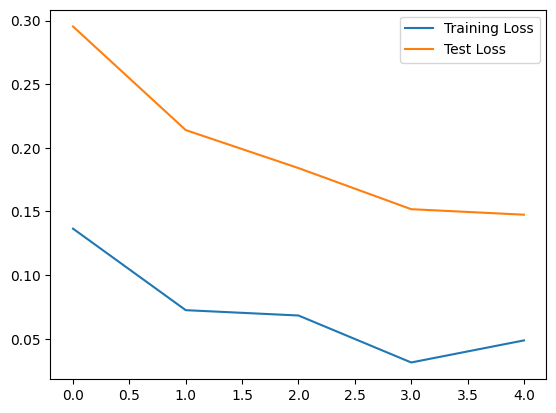

In [22]:
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()

In [23]:
train_correct[0]

tensor(53744)

In [24]:
train_correct[0]/600

tensor(89.5733)

In [25]:
#make a list
train_accuracy=[t/600 for t in train_correct]

In [26]:
train_accuracy

[tensor(89.5733),
 tensor(95.3600),
 tensor(96.7167),
 tensor(97.5000),
 tensor(98.0217)]

In [27]:
test_correct

[tensor(9436), tensor(9592), tensor(9695), tensor(9701), tensor(9762)]

In [28]:
test_accuracy=[t/100 for t in test_correct]

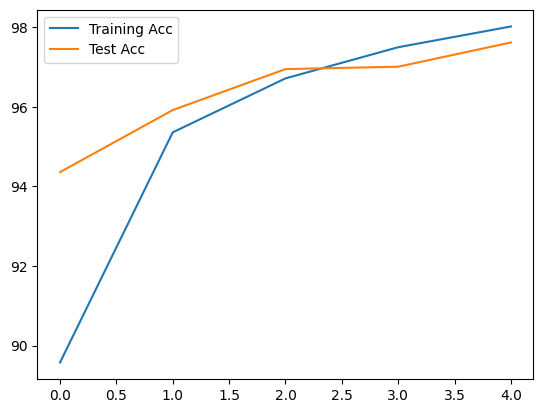

In [29]:
plt.plot(train_accuracy, label='Training Acc')
plt.plot(test_accuracy, label='Test Acc')
plt.legend()

**Test for unseen data**

In [30]:
test_load_all=DataLoader(test_data,batch_size=10000, shuffle=False)

In [38]:
with torch.no_grad():
  correct=0
  for x_test, y_test in test_load_all:
    y_val=model(x_test.view(len(x_test),-1))
    print(y_val.shape)
    predicted=torch.max(y_val,1)[1]
    print(predicted.shape)
    correct=correct+(predicted== y_test).sum()


torch.Size([10000, 10])
torch.Size([10000])


In [40]:
correct.item()

9762

In [41]:
(100*correct.item())/len(test_data)

97.62

In [48]:
confusion_matrix(predicted,y_test)

array([[ 971,    0,    5,    0,    1,    2,    4,    1,    6,    3],
       [   0, 1125,    3,    0,    0,    0,    3,    8,    1,    3],
       [   0,    2, 1003,    2,    3,    0,    1,    8,    2,    0],
       [   2,    2,    3,  990,    0,   10,    1,    6,   10,    8],
       [   1,    0,    2,    0,  955,    2,    3,    0,    4,    9],
       [   1,    1,    0,    7,    0,  869,    3,    1,    7,    4],
       [   2,    2,    4,    0,    4,    5,  943,    0,    3,    0],
       [   1,    0,    6,    7,    2,    1,    0,  999,    4,    7],
       [   1,    3,    6,    3,    2,    1,    0,    0,  935,    3],
       [   1,    0,    0,    1,   15,    2,    0,    5,    2,  972]])

In a 10x10 confusion matrix, each row corresponds to the actual class, and each column corresponds to the predicted class.